## Intro. Pandas에서 날짜 데이터 다루기

### datetime
- 날짜, 시간을 저장하는 클래스
- .now(), .year ~ .microsecond, .weekday(), .time()등등
- srtftime(), .strptime()으로 문자열 <-> datetime 변환
    - 더 편한건 dateutil.parse

### 날짜 연산
- datetime끼리 빼는 건 가능, 덧셈을 불가능
- timedelta객체를 활용하자

### diff()
- .diff(): 앞 시점과의 차이 계산, 파라미터에 n을 넣어 n번째와의 변화량 구할 수 있음
- 추세 제거, 정상성 확보

### 시계열 데이터란?

### 1. 정의
- 순차적인 시간의 흐름에 따라 수집된 데이터
- 연속적, 순서에 따른 상관관계가 존재. 시퀀스 데이터임
    - 과거의 데이터가 미래에 어떤 영향을 미치는가??

- 종/횡단면 데이터
    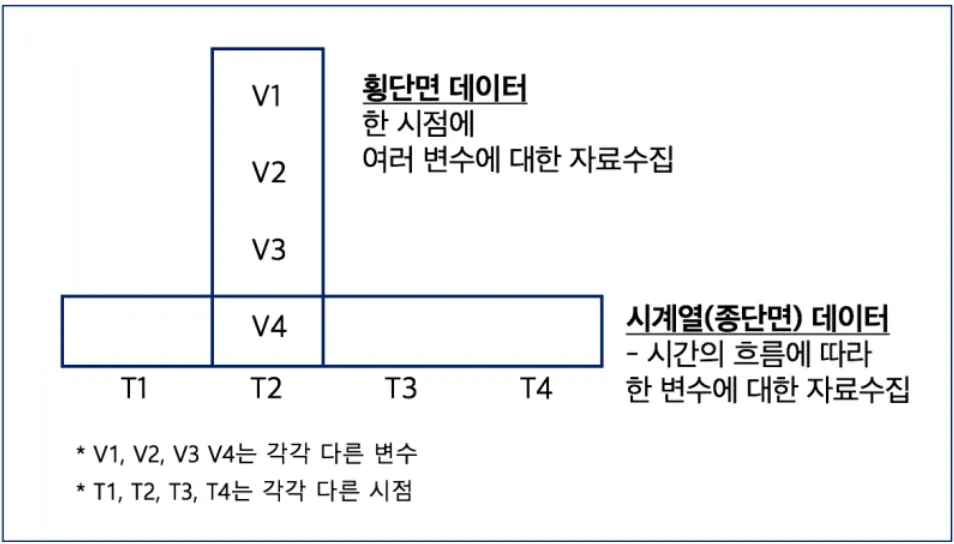
    - 종단면: 시계열 데이터
    - 횡단면: 비시계열 데이터

- 단변량 vs 다변량 시계열
    - 단변량
        - 시간의 흐름에 따라 단일 변수가 연속적으로 측정됨
        - 패턴, 트렌드 이해
        - 주식 가격, 온도, 매출 데이터
    - 다변량
        - 같은 시간에 기록된 둘 이상의 변수로 이루어진 시계열 데이터
        - 변수 간의 관계 파악
        - 경제 지표, 기후 모델

### 2. 분석과 그 목적
- 결국 "미래"를 예측하기 위함
- 시계열 데이터를 분석하고 모델링하여 데이터 구조 파악, 예측, 이상치를 탐지
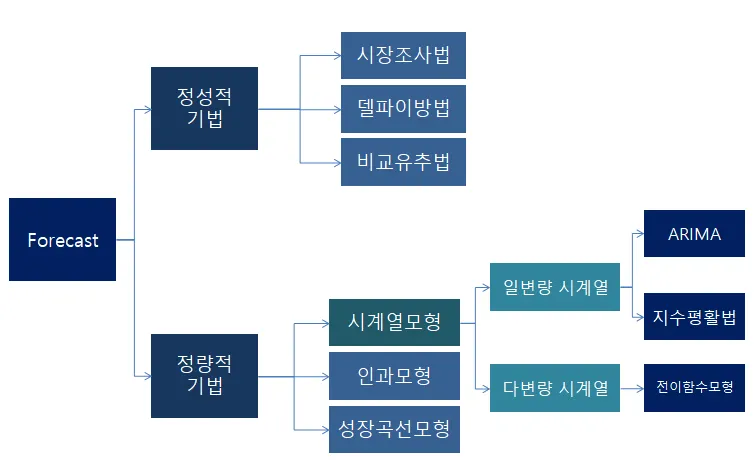

### 시계열 데이터의 특징

1. 시간 의존성
- 시간에 따라 변화하므로 순서가 중요함
- 시점 간의 관계와 영향을 고려해야 함

2. 계절성 (Seasonality), 추세 (Trend)
- 시간에 따른 장기적인 추세 + 일정 주기로 반복되는 패턴
- 계절성
    - 일정 주기에 따라 반복적으로 나타나는 변동
- 추세
    - 시간의 흐름에 따라 나타나는 장기적인 증/감 경향

- 월별 항공기 이용 승객 데이터
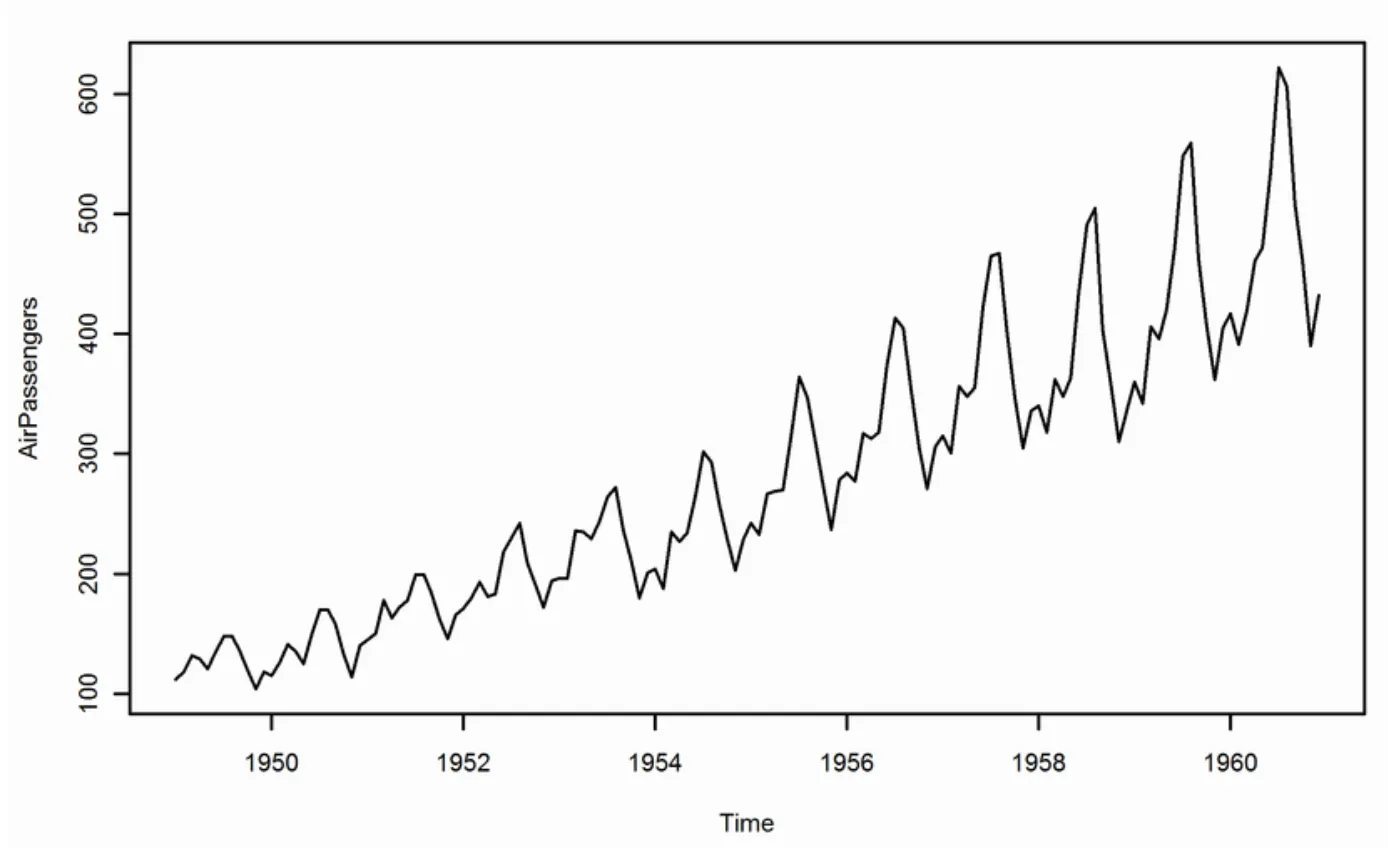

3. 자기상관성 (Autocorrelation)
- 한 시점의 값이 과거의 값과 통계적으로 관련이 있는 특성
- 관측값들은 독립적이지 않음

- 이 때문에 회귀분석이 불가능함
    1. 통계적 추론의 제약 및 오류
        - 자기사오간성이 존재하는 경우 오차항 역시 이전의 오차항에 영향을 받기 때문에 회귀 분석의 통계적 추론(검정, 신뢰구간 등)이 왜곡됨
        -> 정상성 및 추세 확인이 필요함
    2. 예측의 어려움 & 모델의 복잡성 증가
        - 잔차가 패턴을 가지므로 예측값 왜곡 -> 신뢰도 하락
        - AR, ARIMA 등의 시계열 모델이 필요

### 분석 요인

1. 추세 요인 (Trend Factor)
2. 계절 요인 (Seasonal Factor)
3. 순환 요인 (Cycle Factor)
- 계절성보다 더 길고 불규칙적 (주기가 고정적이지 않음, 추세와의 구분이 모호)
4. 불규칙 요인 (Irregular Factor)
- 노이즈, 우연, 일시적 변동, 이상치 등등


종합
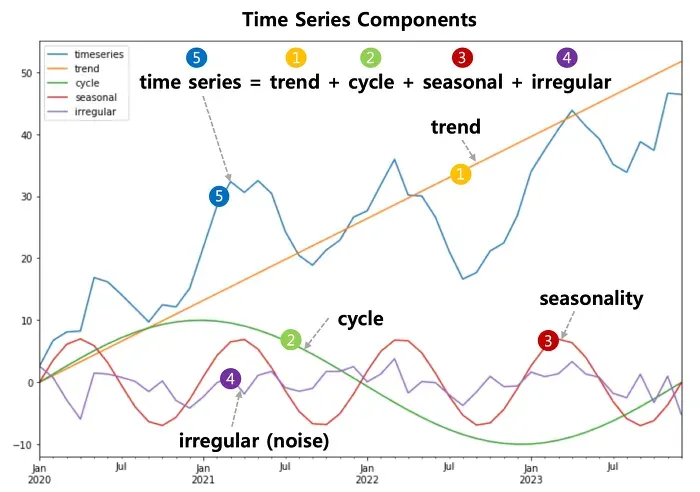

### 분석 워크플로우
1. 데이터 전처리: 결측치 보간, 이상치 제거, 요소 분해
2. 정상성 판단
3. 모델링 및 예측

## 시계열 데이터 전처리

### 1. 이상치/결측치 처리

- 결측치
    - 특정 시점 데이터 누락
    - 적절한 대치와 보간 필요
- 이상치
    - 중요한 의미일 수도 있음. 도메인 지식 필요

1. 결측치 처리
    - 삭제, 단순 대치, 보간, 머신러닝 기법 등
    - 보간: 주어진 데이터 포인트의 값을 통해 두 개 이상의 데이터 포인트 사이의 값 메꾸기
        - 패턴이 단순한 경우 좋음
        - 선형 보간
        - 다항식 보간
        - 스플라인 보간
        - 조각별 상수 보간
        

2. 이상치 탐지 및 처리
- 탐지
    1. IQR을 활용: 단순하고 해석이 명확하지만, 추세나 계절성이 강한 경우 부적합. 분포가 정상적이어야 함
    2. z score: 보통 z값이 3 넘어가면 이상치로 판단. 정규분포가 가정되어야 함
    3. STL 분해: 잔차가 특정 임계값 넘어가는지 확인. 계절성, 추세가 뚜렷한 경우 사용 가능
- 탐지 모델
    1. CART 기반: 예측 오차가 임계값을 넘어가는지 체크해 이상치 판정
    2. 클러스티렁 기반 (노이즈 탐지)
    3. 오토 인코더: 복원 오차가 임계값을 넘어가는지 체크해 이상치 판정


- 처리 방법
    1. 삭제
    2. 단순 대치
    3. 보간

- 평활화 (Smoothing)
    - 노이즈를 줄이고 전체적인 흐름&추세를 더 명확하게 파악하기 위해 데이터를 부드럽게 만들기
        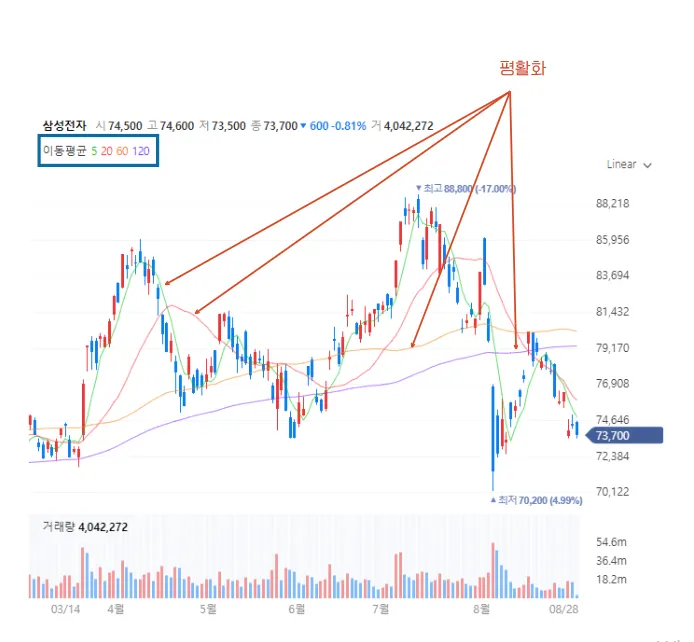
    - 이동평균 (MA)
        - 특정 기간을 부분집합으로 두고 평균을 구해 스무딩
        - 노이즈 제거, 추세 파악, 예측의 기초자료로 활용

        1. 단순 이동평균 (SMA)
            - 특정 기간(n) 데이터의 단순 평균 계산
        2. 가중 이동평균 (WMA)
            - 최근 데이터에 더 높은 가중치 부여
        3. 지수 이동평균 (EMA)
            - 최근 데이터에 더 높은 가중치 부여 & 지수적으로 감소하는 가중치 적용
            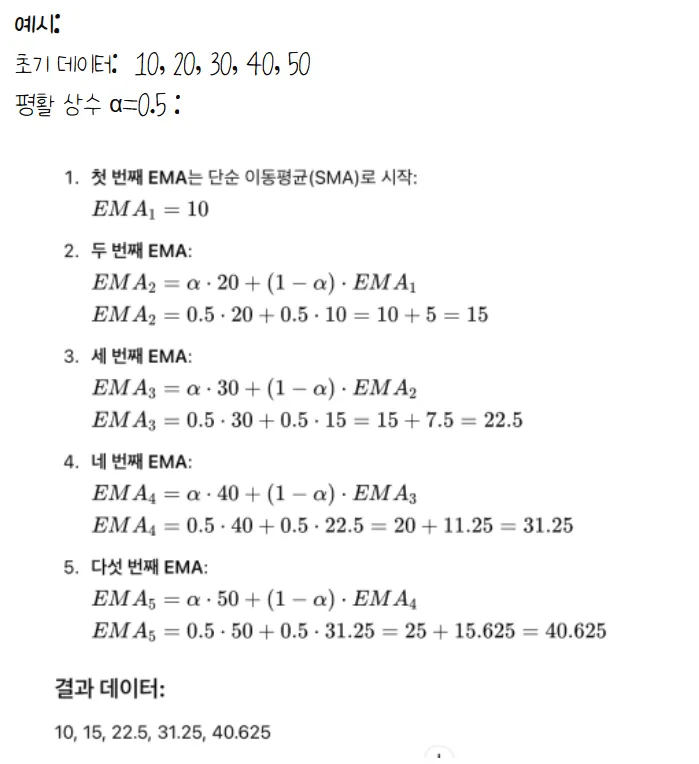
                - 그랑슈미트처럼 재귀적으로 반복 계산. 가중치를 계속 곱해서 지수로 계산됨

### 2. 요소 분해 (Decomposition)

- 요소 분해
    - 시계열 데이터를 각 개별 성분으로 분해하기
        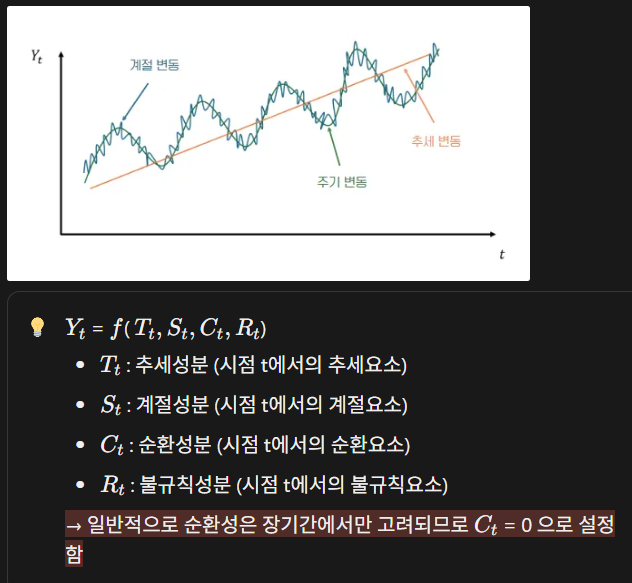
    - 다양한 변동을 각각 분석해볼 수 있고, 더 정교하게 시계열 데이터를 바라볼 수 있음

- 기법 모형

    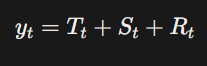
    - 시계열 = 추세 + 계절성 + 불규칙성
    - 위의 각 요인들의 각각 독립적으로 덧셈으로 설명할 수 있다고 가정 (가중치 일정)

- 승법 모형

    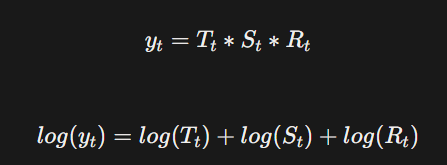
    - 각 요인들이 곱해서 계산한걸 로그 씌워서 가법 형태로 만들기

- 요소 분해 정리
    - STL vs seasonal decompose
    
        |  | STL | seasonal decompose |
        | --- | --- | --- |
        | 요소분해 방식 | LOESS | 이동평균 |
        | 계절성 처리 | 시간에 따라 **변하는  계절성** 반영 | **고정된 계절성**만 반영 |
        | 이상치 영향 | 적게 받음(robust 옵션 가능) | 많이 받음 |
        | 데이터 손실 | 발생 ❌ | 발생 (이동평균 계산 구간만큼 앞뒤 데이터 손실) |

## 정상성 판단

### 1. 정상성이란?
- 시간과 상관 없이 일정하게 가지는 성질
- 정상성을 띠는 시계열은 정상 시계열, 아니면 비정상 시계열이라고 함
    - 시간에 따라 평균과 분산이 일정하면 정상, 평균과 분산의 변동이 커지면 비정상 시계열
    - 정상 시계열이 모델링 및 예측에 적합함

### 2. 강한 정상성과 약한 정상성

- 강한 정상성
    - 모든 적률이 시간과 무관하게 일정함
        - 적률: 확률분포의 모양, 특성을 수치로 요약한 것

            | **적률 순서** | **의미** | **수식 형태** | **예시** |
            | --- | --- | --- | --- |
            | 1차 적률 | 평균 | E[X]
            | 중심 위치 |
            | 2차 적률 | 분산 | Var(X) = E[(X - \mu)^2]
            | 퍼짐 정도 |
            | 3차 적률 | 왜도 | 비대칭성 | 왼쪽/오른쪽 치우침 |
            | 4차 적률 | 첨도 | 뾰족함 정도 | 정규 vs 뾰족한 분포 |

        - 시간에 따라 분포가 일정함
        - 현실에는 거의 없음

- 약한 정상성
    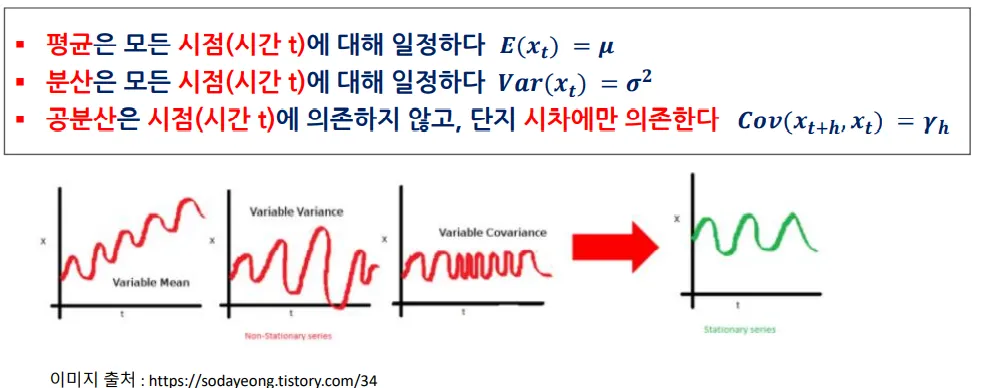
    - 평균이 모든 시점에 대해 일정
    - 분산이 모든 시점에 대해 일정
    - 공분산이 시점에 의존하지 않고, 시차에만 의존함  
    -> 위 3개를 모두 만족하면 약한 정상성을 가진다고 함

### 3. 시각적으로 정상성 파악하기

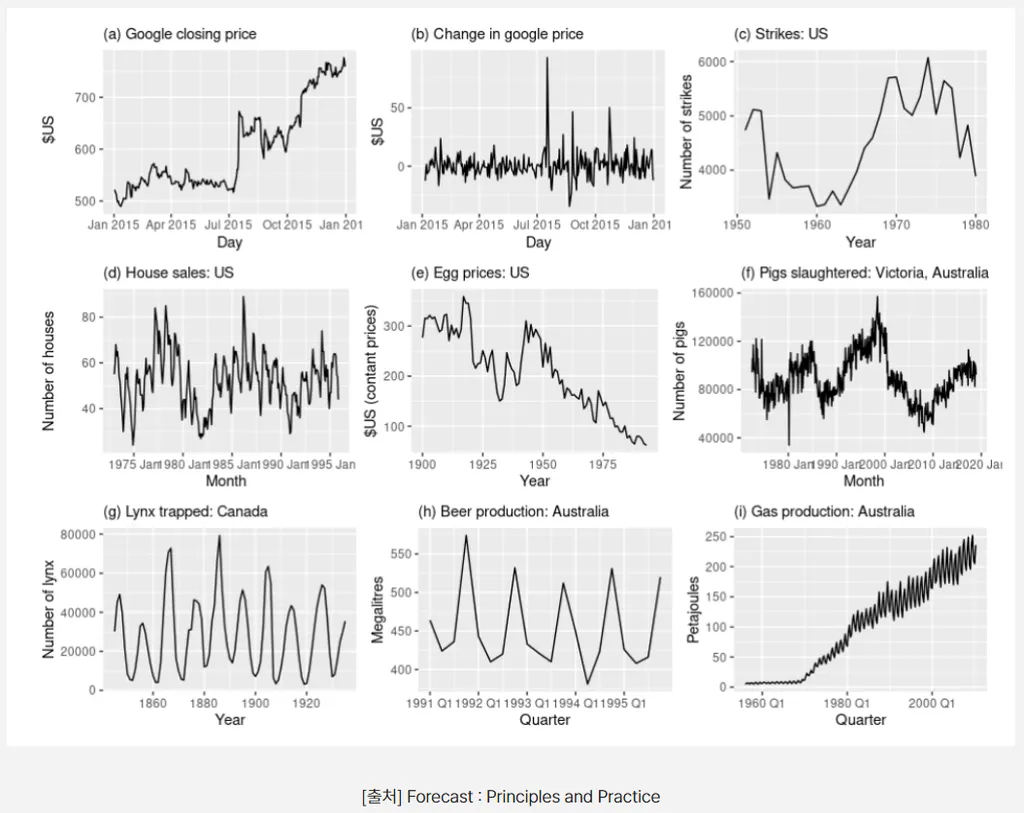

- 정상성을 가지려면
    1. 추세가 없어야 함
    2. 계절성이 없어야 함
    3. 분산이 일정해야 함

    -> b, g
    - b는 a를 차분해서 정상성을 확보함

### 4. 검정을 통해 정상성 판단

- 단위근을 통한 검정
    - 수학적
        - 단위근: 자연수 n에 대해 x^n=1을 만족하는 방정식의 근이 되는 복소수
            - n차 단위근이라고도 함
    - 시계열적
        - 단위근: 시계열 모델의 특성방정식에서 근이 1인 경우, 해당 시계열은 단위근을 가진다고 함. -> 비정상 시계열을 의미
        - 특정 시점의 영향이 영원히 지속됨. (과거의 충격이 누적됨)

- 오늘 값 = α × 어제 값 + 랜덤 충격 에서  

    | α 값 | 의미 | 상태 |
    | --- | --- | --- |
    | α < 1 | 과거 영향이 점점 약해짐 | ✅ 정상 |
    | **α = 1** | 과거 영향이 **그대로 유지** | ❌ **단위근!** |
    | α > 1 | 과거 영향이 점점 강해짐 | ❌ 폭발적 |

    알파 == 1 => 단위근을 가짐

- 단위근이 있으면 비정상 시계열이고, 예측이 힘들어짐
- 시계열 모델을 통해 단위근으로 정상/비정상 시계열을 판단해볼 수 있음
    - 관측값 앞의 계수를 보고 구분? -> 항상 그러는게 맞지는 않음

- 단위근 검정 방법
    1. ADF 검정
        - 시계열에 단위근이 존재하는지 귀무/대립가설을 세워 유의성 판단
        - 단위근이 없을거야~
    2. KPSS
        - ADF와 귀무/대립가설을 반대로 세워 유의성 판단 (대립가설: 단위근이 존재한다)
        - 단위근이 있을거야~

    - 확정적 추세가 존재하는 경우 두 검정의 결론이 서로 다르게 나올 수 있음
        - 확정적 추세: 추세가 완벽하게 예측 가능 & 일정하게 존재
        - 확률적 추세: 랜덤 워크. 추세선 자체가 시간에 따라 이동

### 5. 정상성 확보를 위한 방법들

- 비정상 시계열: 추세 존재 or 계절성 존재 or 분산에 변동 존재
- 추세 제거, 계절성 제거, 분산 일정하게 ...

1. 추세 제거
- 차분

2. 계절성 제거
- 계절 차분

3. 분산 안정화
- 로그변환
    - 변화의 폭이 줄어들어 분산이 어느 정도 일정해짐
- 박스-콕스 변환

    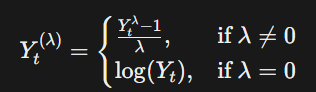
    - 데이터의 최소값이 양수가 되도록 해서 로그 변환을 일반화

- 결국 정상성 확보 -> 패턴 파악 -> 모델링 및 예측을 해야 함